## **1. Louvain Algorithm for community detection**

In [1]:
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx
from collections import Mapping

'Name: \nType: Graph\nNumber of nodes: 4039\nNumber of edges: 88234\nAverage degree:  43.6910'

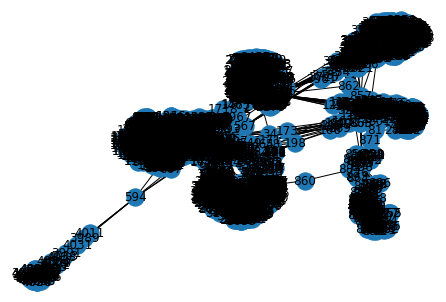

In [2]:
# load the Facebook graph
G = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype=int)
nx.draw(G, with_labels=True)
nx.info(G)

In [3]:
import time

In [4]:
# compute the best partition
start1 = time.time()
partition = community_louvain.best_partition(G)
end1 = time.time()
print('Time required by Louvain algorithm is:', end1-start1)
print(partition)
type(partition)

flipped = {}
for key, value in partition.items():
    if value not in flipped: 
        flipped[value] = [key] 
    else: 
        flipped[value].append(key)

print()
print("Commuities obtained with Louvain Method are:")
print()
for key, value in flipped.items():
    print(key, ' : ', value)

values = flipped.values()
# print(values)

# Utility function to count the number of communities 
count = len(flipped.keys())

print()
print("Number of communities are : " + str(count)) 

Time required by Louvain algorithm is: 2.2540624141693115
{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 1, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0, 101: 0, 102: 0, 103: 0, 104: 0, 105: 0, 106: 0, 107: 2, 108: 0, 109: 0, 110: 0, 111: 0, 112: 0, 113: 0, 114: 0, 115: 0, 116: 0, 117: 0, 118: 0, 119: 0, 120: 0, 121: 0, 122: 0, 123: 0, 124: 0, 125: 0, 126: 0, 127: 0, 128: 0, 129: 0, 130: 0, 131

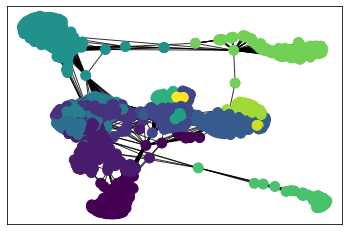

In [5]:
# draw the graph
pos = nx.spring_layout(G)

# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=100, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.8)
plt.show()

## **2. Finding communities in Greedy modularity algorithm**

In [6]:
from networkx.algorithms.community import greedy_modularity_communities
start2 = time.time()
c = greedy_modularity_communities(G)
end2 = time.time()
print('Time required by Greedy modularity algorithm is:',end2 - start2)
print("Communities obtained with Greedy modularity algorithm are:")
print(c)
type(c)

def countList(lst): 
    return len(lst)

print()
x = countList(c)
print("The number of communities obtained :", x) 

Time required by Greedy modularity algorithm is: 15.883382797241211
Communities obtained with Greedy modularity algorithm are:
[frozenset({3261, 3271, 3277, 3280, 3281, 3282, 3291, 3292, 1290, 3330, 3335, 3336, 3337, 3338, 3350, 1317, 3354, 1321, 1323, 1325, 1327, 3368, 3373, 3376, 3378, 2661, 2662, 2665, 3379, 2667, 2668, 3380, 2671, 2672, 2674, 2675, 3381, 2677, 2678, 2975, 2682, 2684, 2685, 2686, 2687, 2688, 3383, 2690, 2691, 2692, 2693, 2696, 2697, 2700, 2701, 2702, 2707, 2708, 2709, 2711, 2712, 2713, 2714, 2715, 2716, 2718, 2719, 2720, 2721, 2722, 2723, 2724, 2725, 3039, 2727, 2728, 2730, 2732, 2733, 2734, 2735, 2736, 2737, 2739, 2742, 2744, 2747, 2748, 2751, 2752, 2753, 2758, 2759, 2760, 2762, 2764, 2765, 2768, 3122, 2770, 2771, 2772, 1365, 2775, 2776, 3401, 2778, 2779, 2780, 2781, 3402, 2783, 2784, 2785, 3403, 2787, 2788, 2790, 2791, 2792, 2793, 2795, 2796, 2797, 2799, 2801, 2802, 2803, 2804, 2805, 3407, 2808, 2811, 2812, 2813, 2816, 2818, 2819, 2820, 2822, 2823, 2824, 2825, 282

## **3. Label Propagation Algorithm for community detection**

In [7]:
# Label propagation community detection algorithms.

from collections import Counter

import networkx as nx
from networkx.utils import groups
from networkx.utils import not_implemented_for
from networkx.utils import py_random_state

__all__ = ["label_propagation_communities", "asyn_lpa_communities"]


@py_random_state(2)
def asyn_lpa_communities(G, weight=None, seed=None):
    labels = {n: i for i, n in enumerate(G)}
    cont = True
    while cont:
        cont = False
        nodes = list(G)
        seed.shuffle(nodes)
        # Calculate the label for each node
        for node in nodes:
            if len(G[node]) < 1:
                continue

            # Get label frequencies. Depending on the order they are processed
            # in some nodes with be in t and others in t-1, making the
            # algorithm asynchronous.
            label_freq = Counter()
            for v in G[node]:
                label_freq.update(
                    {labels[v]: G.edges[node, v][weight] if weight else 1}
                )
            # Choose the label with the highest frecuency. If more than 1 label
            # has the highest frecuency choose one randomly.
            max_freq = max(label_freq.values())
            best_labels = [
                label for label, freq in label_freq.items() if freq == max_freq
            ]

            # Continue until all nodes have a majority label
            if labels[node] not in best_labels:
                labels[node] = seed.choice(best_labels)
                cont = True

    yield from groups(labels).values()



@not_implemented_for("directed")
def label_propagation_communities(G):
    coloring = _color_network(G)
    # Create a unique label for each node in the graph
    labeling = {v: k for k, v in enumerate(G)}
    while not _labeling_complete(labeling, G):
        # Update the labels of every node with the same color.
        for color, nodes in coloring.items():
            for n in nodes:
                _update_label(n, labeling, G)

    for label in set(labeling.values()):
        yield {x for x in labeling if labeling[x] == label}



def _color_network(G):
    coloring = dict()  # color => set(node)
    colors = nx.coloring.greedy_color(G)
    for node, color in colors.items():
        if color in coloring:
            coloring[color].add(node)
        else:
            coloring[color] = {node}
    return coloring


def _labeling_complete(labeling, G):
    return all(
        labeling[v] in _most_frequent_labels(v, labeling, G) for v in G if len(G[v]) > 0
    )


def _most_frequent_labels(node, labeling, G):
    if not G[node]:
        # Nodes with no neighbors are themselves a community and are labeled
        # accordingly, hence the immediate if statement.
        return {labeling[node]}

    # Compute the frequencies of all neighbours of node
    freqs = Counter(labeling[q] for q in G[node])
    max_freq = max(freqs.values())
    return {label for label, freq in freqs.items() if freq == max_freq}


def _update_label(node, labeling, G):
    high_labels = _most_frequent_labels(node, labeling, G)
    if len(high_labels) == 1:
        labeling[node] = high_labels.pop()
    elif len(high_labels) > 1:
        # Prec-Max
        if labeling[node] not in high_labels:
            labeling[node] = max(high_labels)

In [8]:
start3 = time.time()
d = list(label_propagation_communities(G))
end3 = time.time()
print('Time required by label propagation is:',end3 - start3)
print(d)
type(d)

def countList(l): 
    return len(l)

print()
y = countList(d)
print("The number of communities obtained :", y) 

Time required by label propagation is: 0.6322226524353027
[{256, 233}, {3012, 2949, 2983, 3368, 2922, 3063, 3028, 2933, 2805, 2935, 2997, 3155}, {193, 259, 8, 201, 264, 110, 245, 91}, {857, 862, 865, 868, 3437, 3438, 3439, 3440, 3441, 3442, 3443, 3444, 3445, 3446, 3447, 3448, 3449, 3450, 3451, 3452, 3453, 3454, 3455, 3456, 3457, 3458, 3459, 3460, 3461, 3462, 3463, 3464, 3465, 3466, 3467, 3468, 3469, 3470, 3471, 3472, 3473, 3474, 3475, 3476, 3477, 3478, 3479, 3480, 3481, 3482, 3483, 3484, 3485, 3486, 3487, 3488, 3489, 3490, 3491, 3492, 3493, 3494, 3495, 3496, 3497, 3498, 3499, 3500, 3501, 3502, 3503, 3504, 3505, 3506, 3507, 3508, 3509, 3510, 3511, 3512, 3513, 3514, 3515, 3516, 3517, 3518, 3519, 3520, 3521, 3522, 3523, 3524, 3525, 3526, 3527, 3528, 3529, 3530, 3531, 3532, 3533, 3534, 3535, 3536, 3537, 3538, 3539, 3540, 3541, 3542, 3543, 3544, 3545, 3546, 3547, 3548, 3549, 3550, 3551, 3552, 3553, 3554, 3555, 3556, 3557, 3558, 3559, 3560, 3561, 3562, 3563, 3564, 3565, 3566, 3567, 3568, 356

## **Our model**

In [9]:
from operator import itemgetter

def community_by_hubs(G,c):
  #Ordering nodes in order of degree from highest to lowest
  hubs = sorted(G.degree(),key=itemgetter(1),reverse=True)

  ls = []

  for i in range(c):
    ls.append(hubs[i][0])

  community_label = []

  for node in G.nodes:
    community_label.append(0)
    
  label = 0
  for i in ls:
    community_label[i] = label
    label = label + 1

  l = list(set(G.nodes) - set(ls))

  sp = []
  
  for node in l:
    sp = nx.single_source_shortest_path(G,node)
    min = 0
    for a in ls:
      if min == 0:
        min = len(sp[a])
        community_label[node] = community_label[a]
            
      else:
        if min > len(sp[a]):
          community_label[node] = community_label[a]

  return community_label


In [10]:
start4 = time.time()
label = community_by_hubs(G,15)
end4 = time.time()
print('Time required by our algorithm:',end4 - start4)

Time required by our algorithm: 80.00362229347229


In [11]:
D = dict(enumerate(label))
print(D)

D1 = {}
for key, value in D.items():
    if value not in D1: 
        D1[value] = [key] 
    else: 
        D1[value].append(key)

print("Commuities with their nodes:", D1)

print()
print("Commuities obtained with our Method are:")
print()
for key, value in D1.items():
    print(key, ' : ', value)

D2 = list(D1.values())
#print(D2)

# Utility function to count the number of communities 
count1 = len(D1.keys())

print()
print("Number of communities are : " + str(count1))

{0: 4, 1: 4, 2: 4, 3: 4, 4: 4, 5: 4, 6: 4, 7: 4, 8: 4, 9: 4, 10: 4, 11: 4, 12: 4, 13: 4, 14: 4, 15: 4, 16: 4, 17: 4, 18: 4, 19: 4, 20: 4, 21: 4, 22: 4, 23: 4, 24: 4, 25: 4, 26: 4, 27: 4, 28: 4, 29: 4, 30: 4, 31: 4, 32: 4, 33: 4, 34: 13, 35: 4, 36: 4, 37: 4, 38: 4, 39: 4, 40: 4, 41: 4, 42: 4, 43: 4, 44: 4, 45: 4, 46: 4, 47: 4, 48: 4, 49: 4, 50: 4, 51: 4, 52: 4, 53: 4, 54: 4, 55: 4, 56: 4, 57: 4, 58: 0, 59: 4, 60: 4, 61: 4, 62: 4, 63: 4, 64: 4, 65: 4, 66: 4, 67: 4, 68: 4, 69: 4, 70: 4, 71: 4, 72: 4, 73: 4, 74: 4, 75: 4, 76: 4, 77: 4, 78: 4, 79: 4, 80: 4, 81: 4, 82: 4, 83: 4, 84: 4, 85: 4, 86: 4, 87: 4, 88: 4, 89: 4, 90: 4, 91: 4, 92: 4, 93: 4, 94: 4, 95: 4, 96: 4, 97: 4, 98: 4, 99: 4, 100: 4, 101: 4, 102: 4, 103: 4, 104: 4, 105: 4, 106: 4, 107: 0, 108: 4, 109: 4, 110: 4, 111: 4, 112: 4, 113: 4, 114: 4, 115: 4, 116: 4, 117: 4, 118: 4, 119: 4, 120: 4, 121: 4, 122: 4, 123: 4, 124: 4, 125: 4, 126: 4, 127: 4, 128: 4, 129: 4, 130: 4, 131: 4, 132: 4, 133: 4, 134: 4, 135: 4, 136: 5, 137: 4, 138:

## **Calculating Modularity**

In [12]:
from functools import wraps
from itertools import product

import networkx as nx
from networkx import NetworkXError
from networkx.utils import not_implemented_for
from networkx.algorithms.community.community_utils import is_partition

In [13]:
def modularity(G, communities, weight="weight"):
    if not isinstance(communities, list):
        communities = list(communities)
    if not is_partition(G, communities):
        raise NotAPartition(G, communities)

    directed = G.is_directed()
    if directed:
        out_degree = dict(G.out_degree(weight=weight))
        in_degree = dict(G.in_degree(weight=weight))
        m = sum(out_degree.values())
        norm = 1 / m ** 2
    else:
        out_degree = in_degree = dict(G.degree(weight=weight))
        deg_sum = sum(out_degree.values())
        m = deg_sum / 2
        norm = 1 / deg_sum ** 2

    def community_contribution(community):
        comm = set(community)
        L_c = sum(wt for u, v, wt in G.edges(comm, data=weight, default=1) if v in comm)

        out_degree_sum = sum(out_degree[u] for u in comm)
        in_degree_sum = sum(in_degree[u] for u in comm) if directed else out_degree_sum

        return L_c / m - out_degree_sum * in_degree_sum * norm

    return sum(map(community_contribution, communities))

In [14]:
M1 = modularity(G, values, weight = None)
print("Modularity of Louvain Method for community detection: ", M1)

M2 = modularity(G, c, weight = None)
type(M2)
print()
print("Modularity of Greedy Modularity algorithm for community detection: ", M2)

M3 = modularity(G, d, weight = None)
type(M3)
print()
print("Modularity of Label propagation algorithm for community detection: ", M3)

M5 = modularity(G, D2, weight = None)
type(M5)
print()
print("Modularity of our algorithm for community detection: ", M5)

Modularity of Louvain Method for community detection:  0.8346962453774229

Modularity of Greedy Modularity algorithm for community detection:  0.7773775199040279

Modularity of Label propagation algorithm for community detection:  0.7368407345348218

Modularity of our algorithm for community detection:  0.6797600330396342


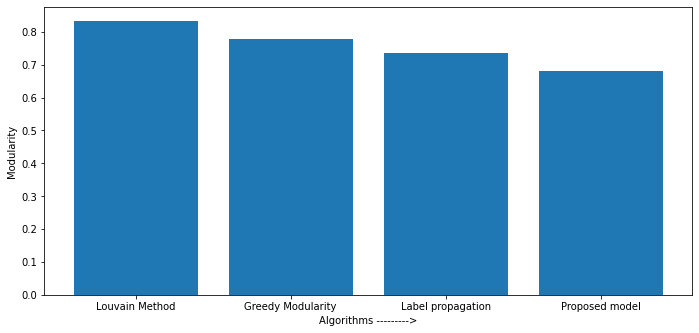

In [15]:
module = [M1,M2,M3,M5]
import matplotlib.pyplot as plt
fig = plt.figure()

ax = fig.add_axes([0,0,1.5,1])
ax.set_ylabel('Modularity')
ax.set_xlabel('Algorithms --------->')
algo = ['Louvain Method', 'Greedy Modularity', 'Label propagation', 'Proposed model']
ax.bar(algo,module)
plt.show()

## **Calculating Performance**

In [16]:
def intra_community_edges(G, partition):
    return sum(G.subgraph(block).size() for block in partition)

def inter_community_edges(G, partition):
    MG = nx.MultiDiGraph if G.is_directed() else nx.MultiGraph
    return nx.quotient_graph(G, partition, create_using=MG).size()

def inter_community_non_edges(G, partition):
    return inter_community_edges(nx.complement(G), partition)

def performance(G, partition):

    intra_edges = intra_community_edges(G, partition)
    inter_edges = inter_community_non_edges(G, partition)

    n = len(G)
    total_pairs = n * (n - 1)
    if not G.is_directed():
        total_pairs //= 2
    return (intra_edges + inter_edges) / total_pairs

In [17]:
P1 = performance(G, values)
print("Performance of Louvain Method for community detection: ", P1)

P2 = performance(G, c)
print()
print("Performance of Greedy Modularity algorithm for community detection: ", P2)

P3 = performance(G, d)
print()
print("Performance of Label propagation algorithm for community detection: ", P3)

P5 = performance(G, D2)
print()
print("Performance of our algorithm for community detection: ", P5)

Performance of Louvain Method for community detection:  0.9139847605215174

Performance of Greedy Modularity algorithm for community detection:  0.856728987468762

Performance of Label propagation algorithm for community detection:  0.8679288526760077

Performance of our algorithm for community detection:  0.8182088186491759


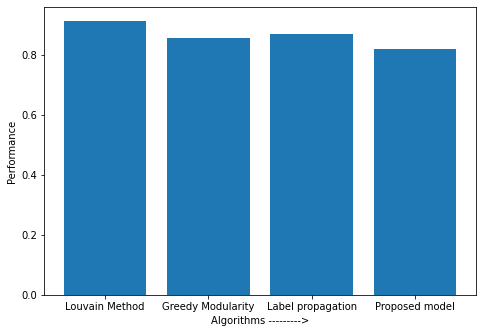

In [26]:
Perf=[P1,P2,P3,P5]
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Performance')
ax.set_xlabel('Algorithms --------->')
algo = ['Louvain Method', 'Greedy Modularity', 'Label propagation', 'Proposed model']
ax.bar(algo,Perf)
plt.show()

## **Calculating coverage**

In [20]:
def coverage(G, partition):
    intra_edges = intra_community_edges(G, partition)
    total_edges = G.number_of_edges()
    return intra_edges / total_edges

In [22]:
C1 = coverage(G, values)
print("The coverage of Louvain Method for community detection :", C1)

C2 = coverage(G, c)
print()
print("The coverage of Greedy Modularity algorithm for community detection :", C2)

C3 = coverage(G, d)
print()
print("The coverage of Label propagation algorithm for community detection :", C3)

C5 = coverage(G, D2)
print()
print("The coverage of our algorithm for community detection :", C5)

The coverage of Louvain Method for community detection : 0.9613300995081261

The coverage of Greedy Modularity algorithm for community detection : 0.9613641000068001

The coverage of Label propagation algorithm for community detection : 0.9782510143482105

The coverage of our algorithm for community detection : 0.8902577237799487


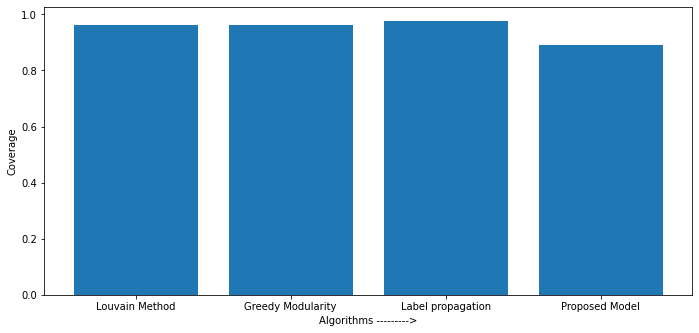

In [23]:
cover=[C1,C2,C3,C5]
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1])
ax.set_ylabel('Coverage')
ax.set_xlabel('Algorithms --------->')
algo = ['Louvain Method', 'Greedy Modularity', 'Label propagation', 'Proposed Model']
ax.bar(algo,cover)
plt.show()

# Plotting times required by each algorithm

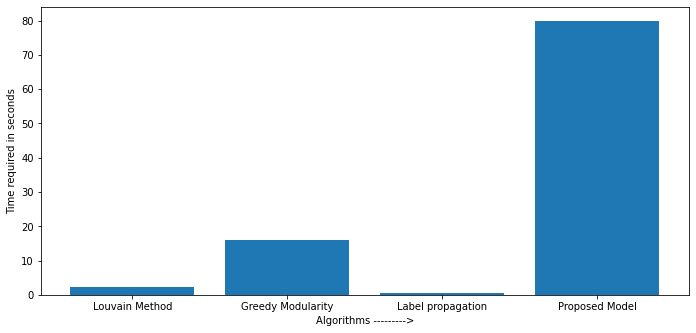

In [25]:
time1 = end1 - start1
time2 = end2 - start2
time3 = end3 - start3
time4 = end4 - start4
t=[time1,time2,time3,time4]
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1])
ax.set_ylabel('Time required in seconds')
ax.set_xlabel('Algorithms --------->')
algo = ['Louvain Method', 'Greedy Modularity', 'Label propagation', 'Proposed Model']
ax.bar(algo,t)
plt.show()